In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os
from   scipy.stats               import ttest_1samp, ttest_ind
from   scipy.stats               import ttest_rel

import warnings
warnings.filterwarnings("ignore")

# Problem #1

Problem Statement:

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

# 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [2]:
WS = pd.read_csv("Wholesale Customer.csv")

In [3]:
WS.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
WS.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [5]:
WS.mean()

Buyer/Spender         220.500000
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

In [6]:
WS.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [7]:
WS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


# 1.1.1 Data Summary : 

  * The given dataset consits of 440 entires and 9 columns. 
  * The dataset consits of no null values and is complete.
  * There are two Channels of sales "Retail", "Hotel" spread across three Regions "Lisbon","Porto","Others"
  * On an average, the max amount of money spent by clients is on "Fresh" and the min amount of spending is on "Delicatessen"     

In [8]:
WS.value_counts("Channel")

Channel
Hotel     298
Retail    142
dtype: int64

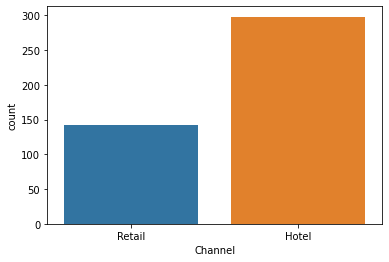

In [9]:
sns.countplot(WS["Channel"])
plt.show()

In [10]:
WS.value_counts("Region")

Region
Other     316
Lisbon     77
Oporto     47
dtype: int64

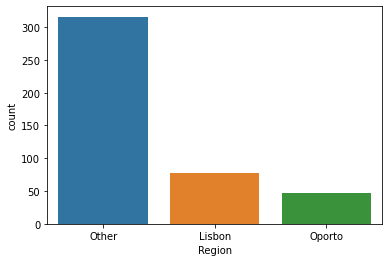

In [11]:
sns.countplot(WS["Region"])
plt.show()

In [12]:
WS["Total"] = WS["Fresh"] + WS["Milk"] + WS["Grocery"] + WS ["Frozen"] + WS["Detergents_Paper"] + WS["Delicatessen"]

In [13]:
WS.groupby('Region').sum()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Region,,,,,,,,
Lisbon,18095,854833,422454,570037,231026,204136,104327,2386813
Oporto,14899,464721,239144,433274,190132,173311,54506,1555088
Other,64026,3960577,1888759,2495251,930492,890410,512110,10677599


In [14]:
WS.groupby('Channel').sum()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Channel,,,,,,,,
Hotel,71034,4015717,1028614,1180717,1116979,235587,421955,7999569
Retail,25986,1264414,1521743,2317845,234671,1032270,248988,6619931


# 1.1.2 , 1.1.3 Client Spending: 

  * From the given dataset we can see that the distibutor has clients who are in Hotels who spend more as compared to Retail clients 
  * We can also find out that regions outside of Lisbon and Oporto contribute the highest in spending, Oporto having spent the   least

# 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [15]:
WS_var = WS.drop(["Buyer/Spender", "Total","Channel"], axis = 1)

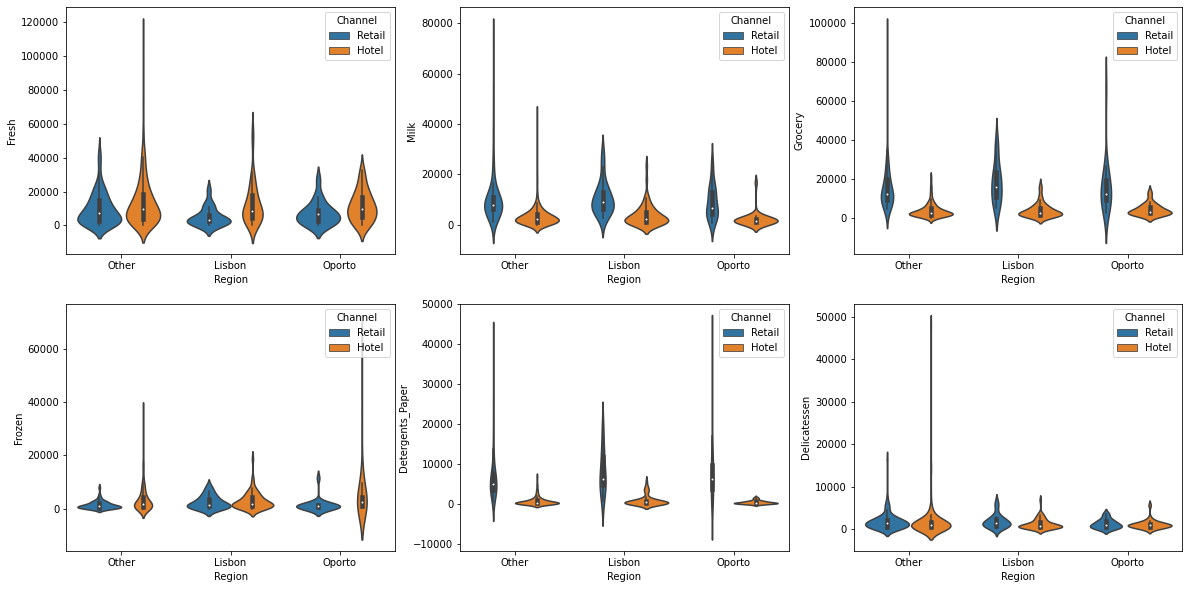

In [16]:
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(20, 10)

a = sns.violinplot(data = WS, x = "Region" , y = "Fresh", hue = 'Channel', ax=axes[0][0])
b = sns.violinplot(data = WS, x = "Region" , y = "Milk", hue = 'Channel', ax=axes[0][1])
c = sns.violinplot(data = WS, x = "Region" , y = "Grocery", hue = 'Channel', ax=axes[0][2])
d = sns.violinplot(data = WS, x = "Region" , y = "Frozen", hue = 'Channel',ax=axes[1][0])
e = sns.violinplot(data = WS, x = "Region" , y = "Detergents_Paper", hue = 'Channel',ax=axes[1][1])
f = sns.violinplot(data = WS, x = "Region" , y = "Delicatessen", hue = 'Channel',ax=axes[1][2])

plt.show()

# 1.2
# Distribution of Varieties across Regions and Channels

* Fresh: We know that this variety has the highest contibution across all regions with an Avg of 12000 euros spent. We can see that Hotels spend more on fresh produce as compared to retail stores.

* Milk:  We can see that Retail clients spend more on Milk as compared to hotels across all regions.

* Grocery: We can see that Retail clients spend more on the variety Grocery as compared to Hotel clients  across all regions.

* Frozen:  We can see from the plots above that Hotel clients spend more on Frozen goods as compared to retail stores across all regions.

* Detergents_Paper: We can see that Retail clients spend more on Detergetns_Paper as compared to hotels across all regions.

* Delicatessen: We know that this variety contibutes to the lowest spending across all regions with an Avg of 1525 euros spent. We can see that the spending is uniform between the channels as compared to the other variables.


# 1.3 On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour? Which items shows the least inconsistent behaviour?

In [19]:
WS_des = WS_var.describe().T
WS_des["range"] = WS_des["max"] - WS_des["min"]
WS_des["iqr"] = WS_des["75%"] - WS_des["25%"]
WS_des["cov"] = (WS_des["std"] / WS_des["mean"]) 
WS_des

,count,mean,std,min,25%,50%,75%,max,range,iqr,cov
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,112148.0,13806.00,1.053918
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,73443.0,5657.25,1.273299
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,92777.0,8502.75,1.195174
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,60844.0,2812.00,1.580332
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,40824.0,3665.25,1.654647
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,47940.0,1412.00,1.849407


In [20]:
# By calculating the Coeffient of Variation (COV) we can see that the Item "Delicatessen" displays the most consistent behaviour while the item "Fresh" displays the least.

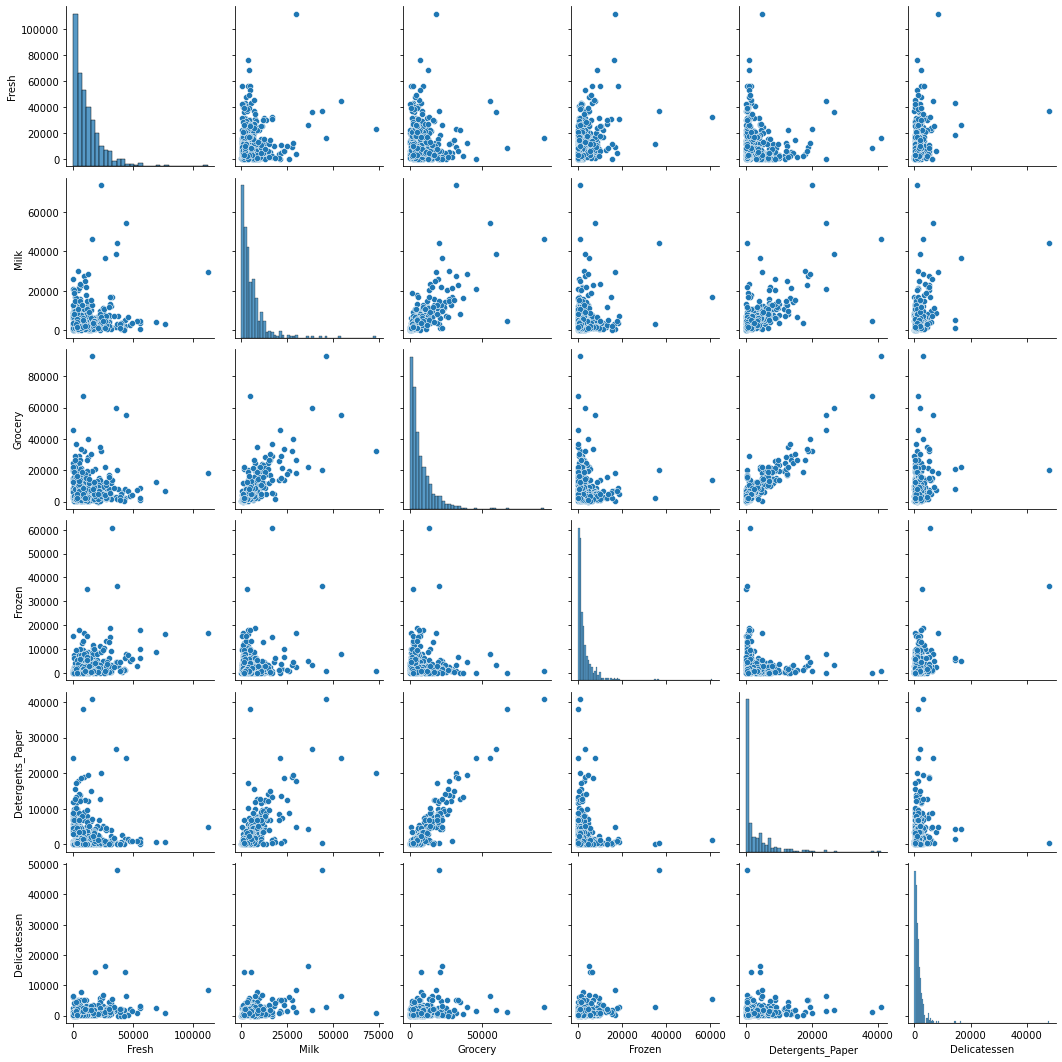

In [23]:
sns.pairplot(WS_var)
plt.show()

# 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

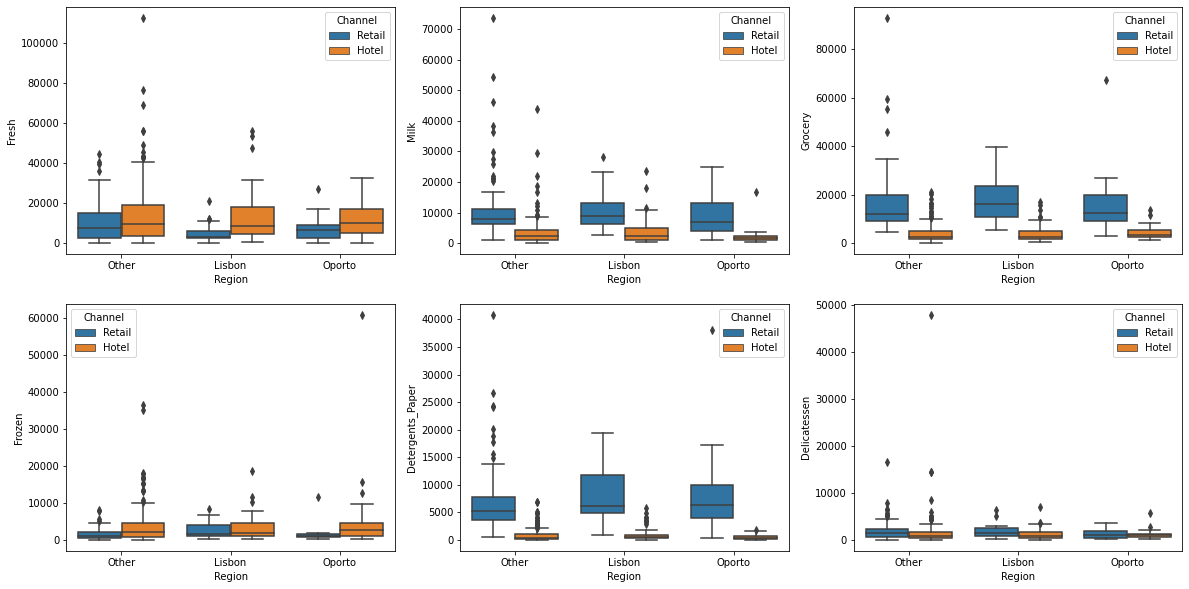

In [24]:
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(20, 10)

a = sns.boxplot(data = WS, x = "Region" , y = "Fresh", hue = 'Channel', ax=axes[0][0])
b = sns.boxplot(data = WS, x = "Region" , y = "Milk", hue = 'Channel', ax=axes[0][1])
c = sns.boxplot(data = WS, x = "Region" , y = "Grocery", hue = 'Channel', ax=axes[0][2])
d = sns.boxplot(data = WS, x = "Region" , y = "Frozen", hue = 'Channel',ax=axes[1][0])
e = sns.boxplot(data = WS, x = "Region" , y = "Detergents_Paper", hue = 'Channel',ax=axes[1][1])
f = sns.boxplot(data = WS, x = "Region" , y = "Delicatessen", hue = 'Channel',ax=axes[1][2])

plt.show()

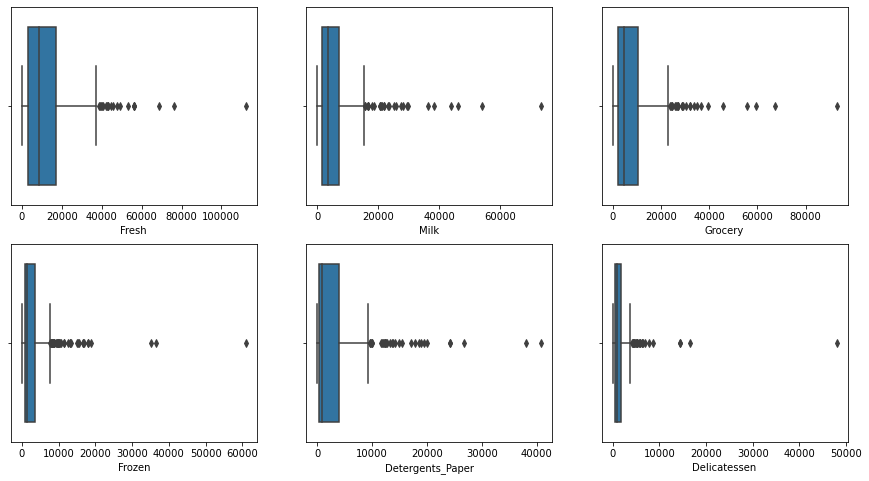

In [25]:
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(15, 8)

a =  sns.boxplot(WS["Fresh"],ax=axes[0][0])
b = sns.boxplot(WS["Milk"],ax=axes[0][1])
c = sns.boxplot(WS["Grocery"], ax=axes[0][2])
d = sns.boxplot(WS["Frozen"],ax=axes[1][0])
e = sns.boxplot(WS["Detergents_Paper"],ax=axes[1][1])
f = sns.boxplot(WS["Delicatessen"],ax=axes[1][2])

plt.show()

# Outliers: 

 * From the above boxplots we can clearly see the outliers in the given variables. It is evident that Retail stores in general have the least amount of outliers.  
 * The outliers indicate that most of there are multiple purchases made that are above the third quartile. This indicates that the mean expenditures does not reflect on the actual sales. 


# 1.5 : 
Refer Business Report

# Problem 2 

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [26]:
stu = pd.read_csv("Survey-1.csv")

In [27]:
stu.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [28]:
stu.value_counts("Gender")

Gender
Female    33
Male      29
dtype: int64

# For this data, construct the following contingency tables

# 2.1 Gender & Major

In [29]:
pd.crosstab(stu['Gender'],stu['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


# 2.2 Gender & Grad Intention

In [30]:
pd.crosstab(stu['Gender'],stu['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


# 2.3 Gender & Employment

In [31]:
pd.crosstab(stu['Gender'],stu['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


# 2.4 Gender & Computer

In [32]:
pd.crosstab(stu['Gender'],stu['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


# 2.2.1 What is the probability that a randomly selected CMSU student will be male?


In [33]:
prob_m = 29/62

print("The probability that a randomly selected student will be male is:",round((prob_m)*100,2),"%")


The probability that a randomly selected student will be male is: 46.77 %


# 2.2.2  What is the probability that a randomly selected CMSU student will be female?

In [34]:
prob_f = 33/62

print("The probability  that a randomly selected student will be female is:",round((prob_f)*100,2),"%")

The probability  that a randomly selected student will be female is: 53.23 %


# 2.3.1Find the conditional probability of different majors among the male students in CMSU.

In [35]:
#Conditional Prob: 
#total #male = 29, #female= 33

male_acc = (4/29) 
male_CIS = (1/29) 
male_Economics_Finance = (4/29) 
male_International_Business = (2/29)
male_Management = (6/29)
male_Other = (4/29) 
male_Retailing_Marketing = (5/29)
male_Undecided = (3/29)

print("The conditional probability among male students based on their majors are :" )
print("Accounting:",round(male_acc*100,2),"%")
print("CIS:",round(male_CIS*100,2),"%")
print("Economics/Finance:",round(male_Economics_Finance*100,2),"%")
print("International Business:",round(male_International_Business*100,2),"%")
print("Management:",round(male_Management*100,2),"%")
print("Other:",round(male_Other*100,2),"%")
print("Retailing/Marketing:",round(male_Retailing_Marketing*100,2),"%")
print("Undecided:",round(male_Undecided*100,2),"%")

The conditional probability among male students based on their majors are :
Accounting: 13.79 %
CIS: 3.45 %
Economics/Finance: 13.79 %
International Business: 6.9 %
Management: 20.69 %
Other: 13.79 %
Retailing/Marketing: 17.24 %
Undecided: 10.34 %


# 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [36]:
female_acc = (3/33) 
female_CIS = (3/33) 
female_Economics_Finance = (7/33) 
female_International_Business = (4/33)
female_Management = (4/33)
female_Other = (3/33) 
female_Retailing_Marketing = (9/33)
female_Undecided = (0/33)


print("The conditional probability among female students based on their majors are :")
print("Accounting:",round(female_acc*100,2),"%")
print("CIS:",round(female_CIS*100,2),"%")
print("Economics/Finance:",round(female_Economics_Finance*100,2),"%")
print("International Business:",round(female_International_Business*100,2),"%")
print("Management:",round(female_Management*100,2),"%")
print("Other:",round(female_Other*100,2),"%")
print("Retailing/Marketing:",round(female_Retailing_Marketing*100,2),"%")
print("Undecided:",round(female_Undecided*100,2),"%")

The conditional probability among female students based on their majors are :
Accounting: 9.09 %
CIS: 9.09 %
Economics/Finance: 21.21 %
International Business: 12.12 %
Management: 12.12 %
Other: 9.09 %
Retailing/Marketing: 27.27 %
Undecided: 0.0 %


# 2.4.1 Find the probability That a randomly chosen student is a male and intends to graduate.

In [37]:
#Prob of male graduating
#total #males = 29 , females = 33
#number of students with the intention of graduating = 11+17 = 28

prob_m = 29/62
prob_of_grad = 28/62
prob_male_grad = 17/28

prob_male_and_grad = (prob_m * prob_male_grad) * 100

print("The probability that a randomly selected student is a male who intends to graduate is :", round(prob_male_and_grad,1),"%")


The probability that a randomly selected student is a male who intends to graduate is : 28.4 %


# 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [38]:
#Females with no laptops
#total students with no laptops = 7

prob_f = 33/62
female_no_laptops = 4/33
prob_f_and_no_laptop = (prob_f * female_no_laptops) * 100

print("The probability that a randomly selected student is a female and does not have a laptop is:", round((prob_f_and_no_laptop),2),"%")


The probability that a randomly selected student is a female and does not have a laptop is: 6.45 %


# 2.5.1 Find the probability that a randomly chosen student is a male or has a full-time employment

In [39]:
prob_m = 29/62
prob_full_time = 10/62
prob_m_full_time = 7/29

prob_m_or_full_time = (prob_m + prob_full_time - prob_m_full_time)*100
print("The probability that a randomly chosen student is male or has a full time job is:", round((prob_m_or_full_time),2),"%")

The probability that a randomly chosen student is male or has a full time job is: 38.77 %


# 2.5.2 Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [40]:
#Cond prob that given a female, she majors in Intl Business or Management
#total no of female students = 33
#total no of female students in Intl Business = 4 , Management = 4

prob_f_majors = 1/33
female_International_Business = 4/33 
female_Management = 4/33
prob_female_Intl_or_Manage = (female_International_Business * female_Management)
prob_f_majors_Int_or_Manage = (prob_female_Intl_or_Manage/prob_f_majors) * 100

print("The conditional probability that the randomly chosen female student is majoring in International Business or Management is: ",round((prob_f_majors_Int_or_Manage),2),"%")

The conditional probability that the randomly chosen female student is majoring in International Business or Management is:  48.48 %


# 2.6 Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think graduate intention and being female are independent events?

In [41]:
noun_stu = pd.crosstab(stu['Gender'],stu['Grad Intention'])

In [42]:
noun_stu.drop('Undecided', axis =1)

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


# The two events are independent because a randomly selected student can be a female and can have of either have the intention to graduate or not.

# 2.7 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. Answer the following questions based on the data

In [43]:
stu.tail() # ["GPA","Salary","Spending","Text Messages"]

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50
61,62,Female,23,Senior,Economics/Finance,No,3.2,Part-Time,70.0,2,3,250,Laptop,0


# 2.7.1 If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [44]:
pd.crosstab(stu['Gender'],stu['GPA'])

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9
Gender,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0


In [45]:
#no of students with GPA < 3 = 8+9 = 17
#total no of students = 62

prob_GPA_less_than_three = (17/62)*100
print("The probability of the student's GPA being less than 3 is: ",round((prob_GPA_less_than_three),2),"%")

The probability of the student's GPA being less than 3 is:  27.42 %


# 2.7.2 Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.

In [46]:
pd.crosstab(stu['Gender'],stu['Salary'])

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0
Gender,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1


In [47]:
#total no of students = 62 ; male = 29 female = 33
#total no of students with salary >= 50 : male = 14 + female = 18 ; total = 32

prob_m_50plus = (14/32)*100
prob_f_50plus = (18/32)*100

print("The conditional probability that a selected male earns 50 or more is:",round((prob_m_50plus),2),"%")
print("The conditional probability that a selected female earns 50 or more is:",round((prob_f_50plus),2),"%")

The conditional probability that a selected male earns 50 or more is: 43.75 %
The conditional probability that a selected female earns 50 or more is: 56.25 %


# 2.8.1 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.

In [48]:
new_stu = stu.drop(["ID","Age","Social Networking","Satisfaction"], axis = 1)

In [49]:
new_stu.describe().T

,count,mean,std,min,25%,50%,75%,max
GPA,62.0,3.129032,0.377388,2.3,2.9,3.15,3.4,3.9
Salary,62.0,48.548387,12.080912,25.0,40.0,50.00,55.0,80.0
Spending,62.0,482.016129,221.953805,100.0,312.5,500.00,600.0,1400.0
Text Messages,62.0,246.209677,214.465950,0.0,100.0,200.00,300.0,900.0


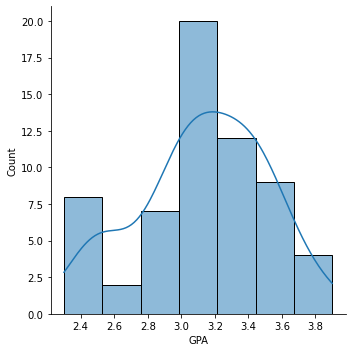

In [59]:
sns.displot(new_stu["GPA"], kde = True)
plt.show()

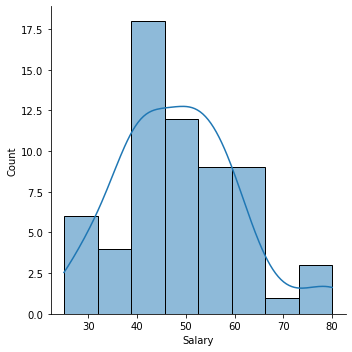

In [57]:
sns.displot(new_stu["Salary"],kde = True)
plt.show()

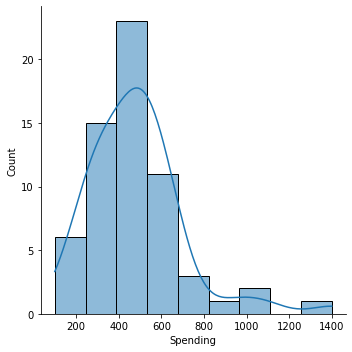

In [56]:
sns.displot(new_stu["Spending"], kde = True)
plt.show()

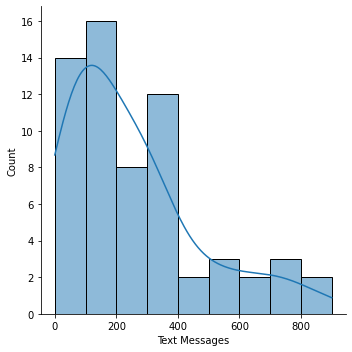

In [55]:
sns.displot(new_stu["Text Messages"], kde = True)
plt.show()

# From the above plots, we can observe the distribution of the four variables. We can see that GPA and Salary follow a normal distribution while Spending and Text Messages show a bit of right skweness in data

# 2.8.2 Write a note summarizing your conclusions for this whole Problem 2.
# Refer Docs

# Problem 3

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

In [78]:
shi = pd.read_csv("A & B shingles-1.csv")

In [79]:
shi.sum()

A    11.40
B     8.48
dtype: float64

In [71]:
shi.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [81]:
shi.tail()

,A,B
31,0.40,NaN
32,0.29,NaN
33,0.43,NaN
34,0.34,NaN
35,0.37,NaN


In [66]:
shi.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


# 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

#3.1

Constructing Hypothesis: 

H0 : Mean Moisture content of Shingles = 0.35 (or can be written as >= 0.35)

H1 : Mean Moisture content of Shingles < 0.35

Level of significance:
alpha = 0.05

Test conditions: 
Since the two samples are independent, we conduct individual tests on each type of shingles.
The test conducted will be a One tail test.
The population standard deviation is unknown.

One Sample T-test formula : 

t = (Xbar - mu(expected value))/(s/sqrt(n))


If P value > alpha , null hypothesis is not rejected

If P value < alpha , null hypothesis is rejected which means the mean moisture content both types of Shingles are within the permissible limits 

In [94]:
shi.var() #sample variance 

A    0.018423
B    0.018850
dtype: float64

# Calculating the T stat and P value of Shingle type A

In [117]:
t_statistic, p_value_A = ttest_1samp(shi_na["A"], 0.35)
print('tstat:',t_statistic)    
print('P_Value_A:',p_value_A) 

tstat: -1.6005252585398313
P_Value_A: 0.11996170801033942


In [119]:
# P_value > alpha 

# Since, P value > alpha , null hypothesis is not rejected

# Hence the mean moisture content of the Shingles A is not within the permissible limit of 0.35

In [ ]:
shi_B = shi["B"].dropna()

Sample Size of B: 31 

# Calculating the T stat and P value of Shingle type B

In [118]:
t_statistic, p_value_B = ttest_1samp(shi_B, 0.35)
print('tstat:',t_statistic)    
print('P_Value_B:',p_value_B) 

tstat: -3.1003313069986995
P_Value_B: 0.004180954800638363


In [ ]:
# P_value > alpha 

# Since, P value > alpha , null hypothesis is not rejected

# Hence the mean moisture content of the Shingles A is not within the permissible limit of 0.35

We can conclude that at 95% there is sufficient evidence to prove that the type 'A' shingles have a mean moisture content which is less than the permissible limit of 0.35 and type 'B' shingles have a mean moisture content that lies within the given limit

# 3.2 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

#3.2 

Hypothesis: 

H0 : uA = uB

Ha : uA not equal to uB

Two Tailed test

Assumptions that the variance are equal

Since the variances of both the samples are equal and the mean of the population is unknown, we conduct a Two sample T-test: 

Two sample T-Test: 

t = (x1_bar - x2_bar)/sqrt((s1**2)/n1 + (s2**2)/n2) 


x1_bar = 0.316667
x2_bar = 0.273548

n1 = 36
n2 = 31

s1 = 0.135731
s2 = 0.137296  


alpha = 0.05
dof= 65

In [74]:
x1_bar = 0.316667
x2_bar = 0.273548

In [75]:
s1 = 0.135731
s2 = 0.137296    

In [88]:
#Since B has null values, we can drop those inorder to calculate
shi_B = shi["B"].dropna()

In [148]:
n1 = 36
n2 = 31
dof = n1 + n2 - 2

In [121]:
t_statistic, p_value  = ttest_ind(shi['A'],shi_B)
print('tstat:',t_statistic)    
print('p_Value:',p_value) 

tstat: 1.289628271966112
p_Value: 0.2017496571835328


# P_value > alpha 

# Since, P value > alpha , null hypothesis is not rejected

# Hence we can conclude that at 95% there is sufficient evidence to prove that the population mean of the Shingles A and Shingles B are equal